In [ ]:
# Python Mini Project
# Project: Moving Average Crossover Trading Strategy (with list input)

In [13]:
print("Moving Average Crossover Trading Strategy")
print('''We will use 3 days moving average as short term
and 5 days moving average as long term and then on crossover displays a signal buy / sell''')

data = [
("01", 100),
("02", 102),
("03", 104),
("04", 101),
("05", 105),
("06", 107),
("07", 110),
("08", 108),
("09", 106),
("10", 104),
("11", 103),
("12", 102),
("13", 101),
("14", 105),
("15", 108),
("16", 110),
("217", 112),
("18", 115),
("19", 117),
("20", 120),
]

n = 3 # Short term moving average 
m = 5 # Long Term moving average

short_ma = []
long_ma = []

prices = [price for _, price in data]
dates = [d for d, _ in data]
for i in range(len(prices)):
    if i > n - 1: # check if we have enough data ?
        short_ma.append(sum(prices[i-n+1:i+1]) / n)
    else:
        short_ma.append(None)
    if i > m -1: # check if we have enough data ?
        long_ma.append(sum(prices[i-m+1:i+1]) / m)
    else:
        long_ma.append(None)

signals = []
position = False 
cash = 10000
shares = 0 

buy_signals = []
sell_signals = []

for i in range(len(data)):
    date, price = data[i]

    if short_ma[i] is not None and long_ma[i] is not None:
        # Buy Signal
        if short_ma[i] > long_ma[i] and not position:
            signals.append((date, "BUY", price))
            buy_signals.append((dates[i], prices[i]))
            shares = cash // price
            cash -= shares * price
            position = True

        # Sell Signal
        elif short_ma[i] < long_ma[i] and position:
            signals.append((date, "SELL", price))
            sell_signals.append((dates[i], prices[i]))
            cash += shares * price
            shares = 0
            position = False
final_value = cash + shares * prices[-1]

print("Signals Generated:")
for signal in signals:
    print(signal[0], signal[1], f"at {signal[2]}")

print(f"\nFinal Portfolio Value: ${final_value:.2f}")


Moving Average Crossover Trading Strategy
We will use 3 days moving average as short term
and 5 days moving average as long term and then on crossover displays a signal buy / sell
Signals Generated:
06 BUY at 107
10 SELL at 104
15 BUY at 108

Final Portfolio Value: $10801.00


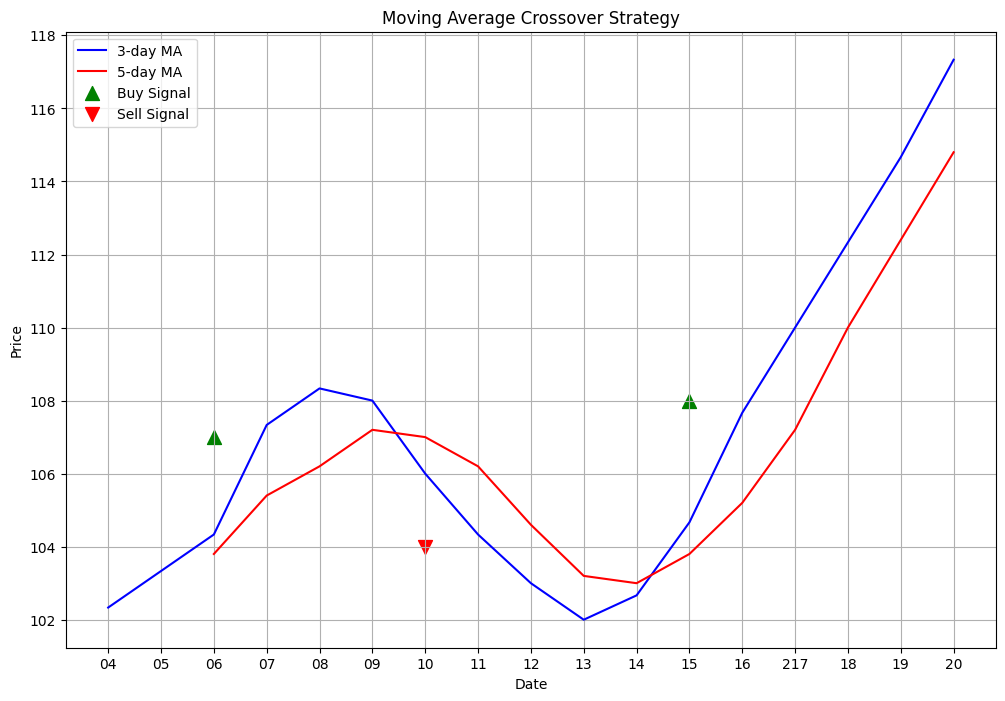

In [15]:
import matplotlib.pyplot as plt 

dates = [d for d, _ in data]
plt.figure(figsize=(12,8))
# plt.plot(dates, prices, label="Price", color="black", linewidth=2)
plt.plot(dates, short_ma, label="3-day MA", color="blue", linewidth=1.5)
plt.plot(dates, long_ma, label="5-day MA", color="red", linewidth=1.5)

# Plot buy/sell points
plt.scatter([d for d, _ in buy_signals], [p for _, p in buy_signals], marker="^", color="green", s=100, label="Buy Signal")
plt.scatter([d for d, _ in sell_signals], [p for _, p in sell_signals], marker="v", color="red", s=100, label="Sell Signal")

plt.title("Moving Average Crossover Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()